# 权重衰减

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l
from torch import nn

$$
y = 0.05 + \sum_{i=1}^{d} 0.01x_i + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, 0.01^2)
$$

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size)

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w,b]

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2))/2

In [24]:
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [25]:
def train(lambd, num_epochs = 100):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w,b), d2l.squared_loss
    lr = 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X), y) + l1_penalty(w) * lambd
            l.sum().backward()  # 这里用sum()是因为loss对每个样本返回一个标量，需要对batch中的所有loss求和再反向传播，这样梯度才能正确累积
            d2l.sgd([w, b], lr, batch_size)
        if (epoch+1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.915472984313965


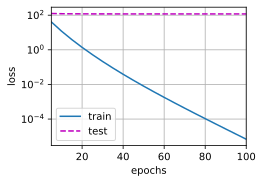

In [16]:
train(lambd=0)

w的L2范数是： 1.3250741958618164


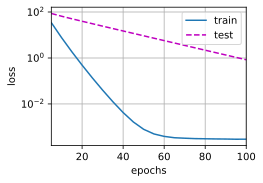

In [17]:
train(lambd=2)

w的L2范数是： 0.10216937214136124


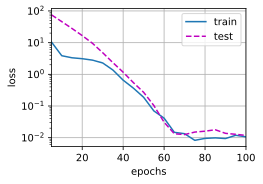

In [26]:
train(lambd=4)

w的L2范数是： 0.02950659766793251


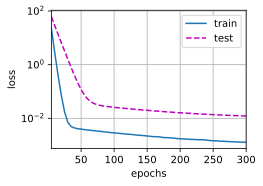

In [20]:
train(lambd=6, num_epochs=300)